<a href="https://colab.research.google.com/github/guimaraesjeh/python_datacleaning/blob/main/python_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01) Leia o arquivo e inspecione os dados

In [ ]:
#Bibliotecas

import pandas as pd # Manipulação e análise de dados.
import seaborn as sns # Visualização estatística baseada no matplotlib.
import matplotlib.pyplot as plt # Criação de gráficos e visualizações.
import numpy as n # Operações matemáticas e manipulação de arrays.
from sklearn.preprocessing import scale, minmax_scale, power_transform # erramentas para pré-processamento de dados, incluindo normalização e transformação.

In [ ]:
#Importando raw dataset e visualização
# Lê o arquivo data.csv, utilizando a codificação "latin-1" para evitar problemas com caracteres especiais.

df  = pd.read_csv("data.csv", encoding='latin-1')

# Exibe as cinco primeiras linhas do DataFrame para uma visualização inicial.

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Análise exploratória dos dados
# df.info(), que exibe informações sobre colunas, tipos de dados e valores nulos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Descrição estatística dos dados
# Após a inspeção inicial dos dados, o código executa uma análise estatística descritiva usando

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 02) Valores faltantes na identificação do cliente

In [ ]:
# Com base nas informações obtidas em df.info(), destaca-se a feature CustumerId com dados faltantes
# clientes sem identificaçao e produtos sem descriçao não podem entrar no modelo

df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
# O código abaixo verifica a quantidade de valores ausentes (nulos) em cada coluna do DataFrame df:

df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Para remover todas as linhas que contêm valores nulos em qualquer coluna,
# O argumento inplace=True faz com que as alterações sejam aplicadas diretamente no DataFrame original, sem necessidade de reatribuição.

df.dropna(inplace= True)

In [ ]:
# verificando se ainda existem nulos
# Se o retorno mostrar que todas as colunas têm 0 valores nulos, significa que a limpeza foi bem-sucedida.

df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
# O código abaixo usa query() para contar quantos registros possuem valores negativos (< 0) em UnitPrice ou Quantity
# O resultado mostra a quantidade de registros com valores negativos ou zero em cada coluna. Há 8.945 ocorrências nessas condições.

df.query('UnitPrice <=0 or Quantity <=0').count()

,0
InvoiceNo,8945
StockCode,8945
Description,8945
Quantity,8945
InvoiceDate,8945
UnitPrice,8945
CustomerID,8945
Country,8945


In [ ]:
# Para garantir que o dataset contenha apenas registros válidos, aplica-se filtros que removem os valores menores ou iguais a zero:

# Dois filtros booleanos:
# Filtrando os valores > 0

filtro_preco = df['UnitPrice'] > 0
filtro_quantidade = df['Quantity'] > 0

# Adicionando filtros ao DF, Isso remove todas as linhas onde UnitPrice ou Quantity são menores ou iguais a zero.

df = df[filtro_preco & filtro_quantidade]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificando os valores < 0 nas features UnitPrice e Quantity

df.query('UnitPrice <=0 or Quantity <=0').count()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Etapa 04) Verifique se existem linhas duplicadas

In [ ]:
# Verificando dados duplicados
# df.duplicated() retorna um array booleano, onde True indica que a linha é duplicada.
# .sum() conta quantos valores True existem, ou seja, o número total de registros duplicados.
#  foram encontradas 5.192 linhas duplicadas.

df.duplicated().sum()

5192

In [ ]:
# Retirando dados duplicados
# drop_duplicates() remove automaticamente todas as linhas duplicadas, mantendo apenas a primeira ocorrência.
# O argumento inplace=True faz com que a modificação seja aplicada diretamente no DataFrame, sem necessidade de reatribuição.

df.drop_duplicates(inplace=True)

In [ ]:
# Verificando se ainda existem dados duplicados

df.duplicated().sum().any()

False

# Etapa 05) Tipos de dados da coluna

In [ ]:
#Realizando a alteração do TYPE das coluna CustomerID
# CustomerID: Convertido para int (inteiro), pois representa um identificador numérico.

# Este código converte a coluna InvoiceDate do DataFrame df para o formato de data e hora utilizando a função pd.to_datetime()
# df.InvoiceDate → A coluna contendo os valores de data/hora no formato de texto.
# format='%m/%d/%Y %H:%M' → Define o formato das datas na coluna, garantindo uma conversão correta.

df = df.astype({'CustomerID':'int'})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# Etapa 06) Tratando os outliers

<Axes: >

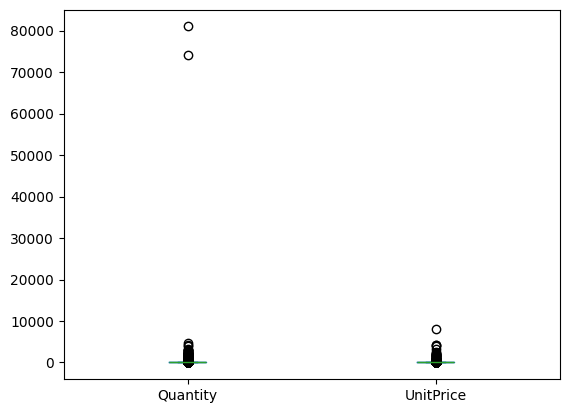

In [ ]:
# Antes de remover os outliers, utiliza-se um box plot para visualizar a distribuição dos dados e identificar pontos que estão fora do padrão esperado.

df[["Quantity","UnitPrice"]].plot.box()

In [ ]:
# remoçao dos outliers extremos em que "Quantity" seja menor ou igual a 10.000 e "UnitPrice" seja menor ou igual a 5.000

df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

<Axes: >

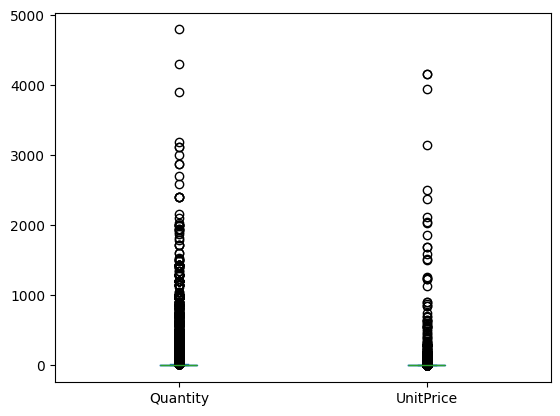

In [ ]:
# Depois de remover os outliers, gera-se um novo box plot para verificar a distribuição dos dados:

df[["Quantity","UnitPrice"]].plot.box()

In [ ]:
# Verificando os outliers em quesito valores máximos

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392689.000000,392689,392689.000000,392689.000000
mean,12.724550,2011-07-10 19:13:27.579534848,3.105194,15287.846520
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,4800.000000,2011-12-09 12:50:00,4161.060000,18287.000000
std,43.083696,NaN,18.055047,1713.538259


# Etapa 07) Crie uma coluna adicional

In [ ]:
# Adiconando coluna com o preço total da compra
# A coluna "TotalPrice" é gerada multiplicando a quantidade de itens (Quantity) pelo preço unitário (UnitPrice).

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Etapa 08) Última data

In [ ]:
# Calculando a data da última compra no dataset
# A função max(df["InvoiceDate"]) retorna o último valor da coluna "InvoiceDate", que contém as datas das transações.

ultima_compra = max(df["InvoiceDate"])

# Etapa 09) Plotando gráficos

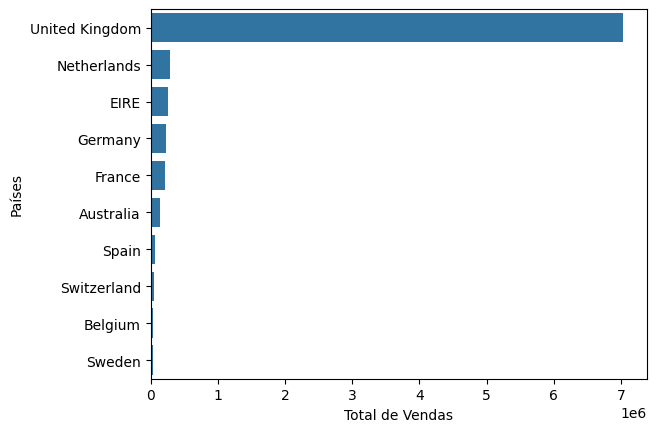

In [ ]:
# Top 10 países com maior valor em vendas
# Agrupa os dados pela coluna "Country", somando os valores da coluna "TotalPrice".
# Ordena os países pelo total de vendas (sort_values(ascending=False)).
# Seleciona os 10 países com maior faturamento (head(10)).
# Cria um gráfico de barras horizontal usando sns.barplot().

top_10_paises = df.groupby('Country').sum('TotalPrice').sort_values(by='TotalPrice', ascending=False).head(10)
sns.barplot(data=top_10_paises, y='Country', x='TotalPrice')
plt.xlabel('Total de Vendas');
plt.ylabel('Países');

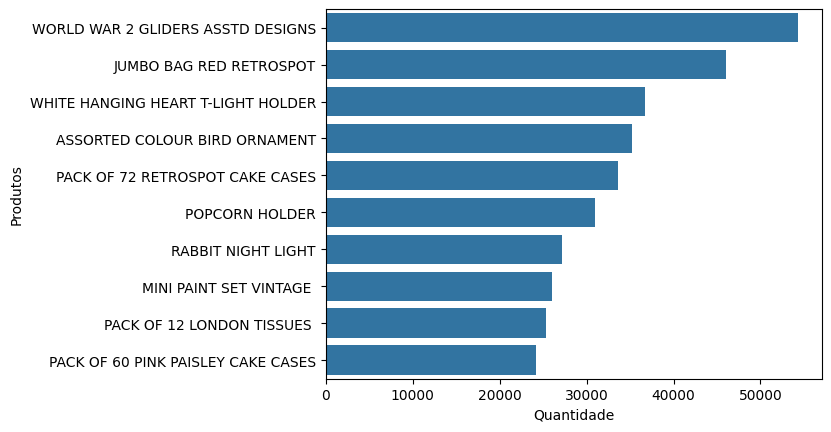

In [ ]:
# Top 10 produtos mais vendidos
# Agrupa os dados pela coluna "Description" (descrição dos produtos).
# Soma a quantidade total de cada produto (sum()["Quantity"]).
# Ordena os produtos pelo volume de vendas (sort_values(ascending=False)).
# Seleciona os 10 produtos mais vendidos (head(10)).
# Cria um gráfico de barras horizontal com sns.barplot().

top_10_produtos = df.groupby('Description').sum('Quantity').sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(data=top_10_produtos, y='Description', x='Quantity')
plt.xlabel('Quantidade');
plt.ylabel('Produtos');

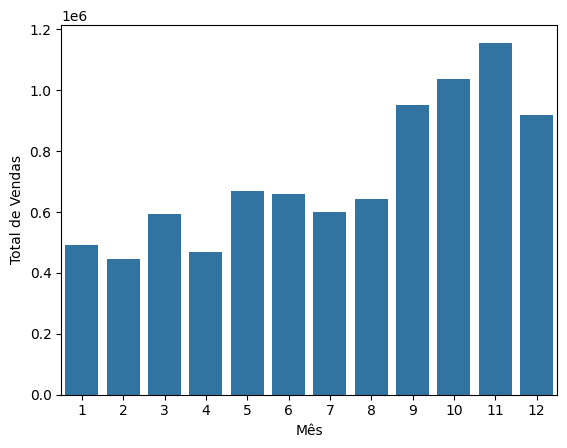

In [ ]:
# Valor de venda total por mês
# Extrai o mês das datas das faturas e cria uma nova coluna "Mês".
# Agrupa os dados por mês e soma o total de vendas (groupby("Mês").sum()["TotalPrice"]).
# Cria um gráfico de barras (sns.barplot()) para visualizar as vendas ao longo dos meses.

df['Mes'] = df['InvoiceDate'].dt.month
vendas_por_mes = df.groupby('Mes').sum('TotalPrice')

sns.barplot(data=vendas_por_mes, x='Mes', y='TotalPrice');
plt.xlabel('Mês');
plt.ylabel('Total de Vendas');

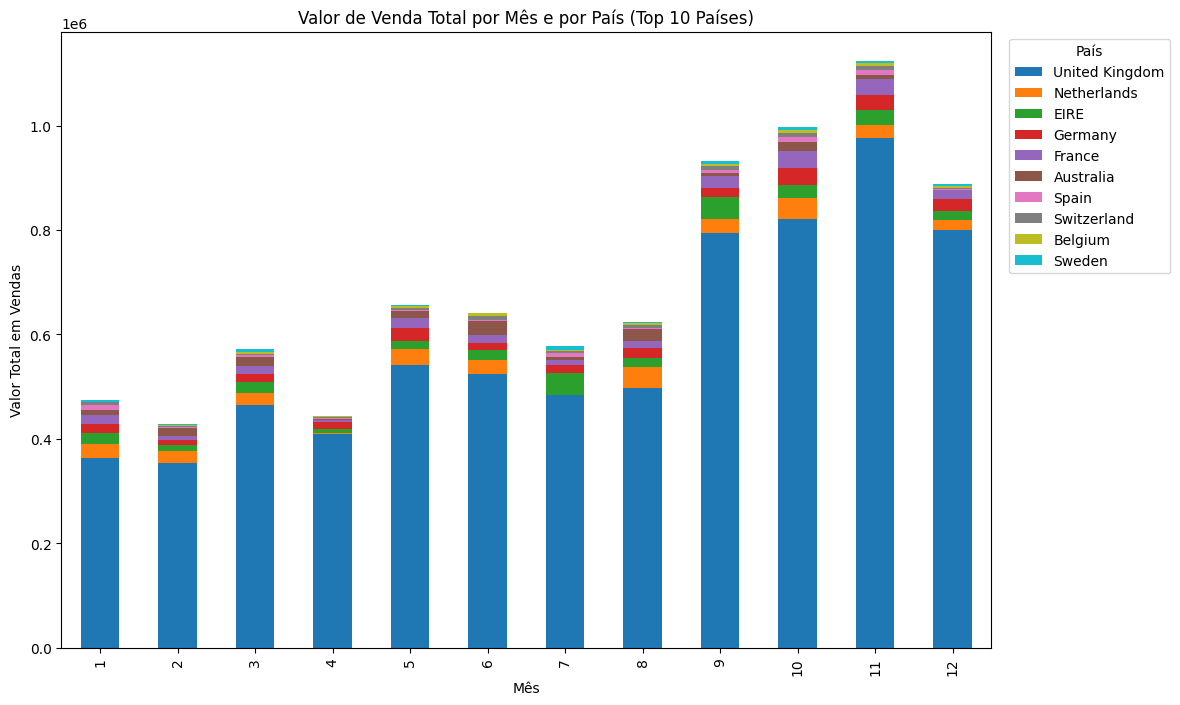

In [ ]:
# Valor de venda total por mês e por país (considere apenas os top 10)
# Filtra os 10 países com maior faturamento (nlargest(10).index).
# Agrupa os dados por "Mês" e "Country", somando os valores (groupby(["Mês", "Country"])["TotalPrice"].sum()).
# Usa .unstack() para transformar os países em colunas.
# Ordena os países pelo faturamento total.

top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10).index
venda_por_mes_pais = df[df['Country'].isin(top_paises)].groupby(['Mes', 'Country'])['TotalPrice'].sum().unstack()
venda_por_mes_pais = venda_por_mes_pais[top_paises].sort_index(ascending=True)  # Ordenar do maior para o menor
venda_por_mes_pais.plot(kind='bar', figsize=(12, 8), stacked=True)

# Plotando o gráfico
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Etapa 10) Cálculo do RFM

In [ ]:
# Neste código, calculamos três métricas para cada cliente:
# Recência (R): Quantos dias se passaram desde a última compra.
# Frequência (F): Quantidade de compras realizadas.
# Ticket Médio (M): Valor médio gasto por compra.


# Definir a data de referência (última compra)
# A data mais recente da coluna "InvoiceDate" é usada como referência para calcular a recência.

data_ultima_compra = df['InvoiceDate'].max()

# Criar o DataFrame RFM usando agg com dicionário
# Agrupamos os dados por "CustomerID" para calcular as métricas individuais de cada cliente.
# Recência: Calcula a diferença em dias entre a última compra do cliente e a data mais recente no dataset.
# Frequência: Conta quantos pedidos ("InvoiceNo") únicos o cliente realizou.
# Ticket Médio: Calcula o gasto médio do cliente por compra.

rfm = df.groupby('CustomerID').agg(
    Recencia=('InvoiceDate', lambda x: (data_ultima_compra - x.max()).days),  # Recência
    Frequencia=('InvoiceNo', 'nunique'),  # Frequência
    TicketMedio=('TotalPrice', 'mean')  # Ticket Médio
).reset_index()

# Exibir o resultado
print(rfm.head())

   CustomerID  Recencia  Frequencia  TicketMedio
0       12347         1           7    23.681319
1       12348        74           4    57.975484
2       12349        18           1    24.076027
3       12350       309           1    19.670588
4       12352        35           8    29.482824
